In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("boston_housing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

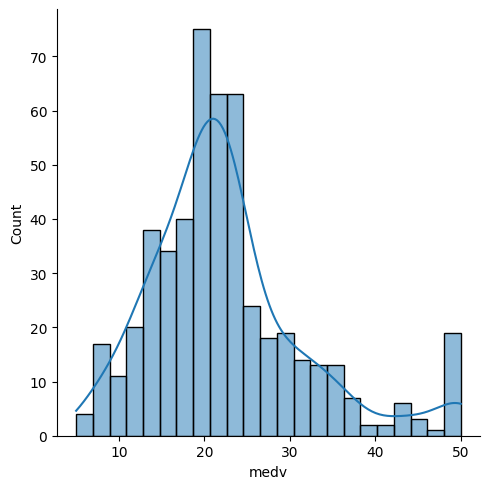

In [6]:
sns.displot(data=df['medv'], kde=True)

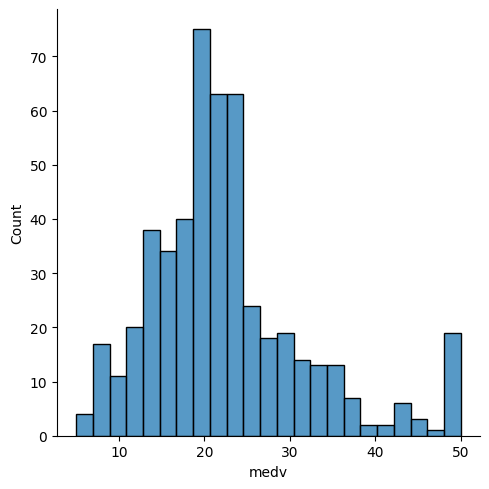

In [7]:
sns.displot(data=df['medv'])

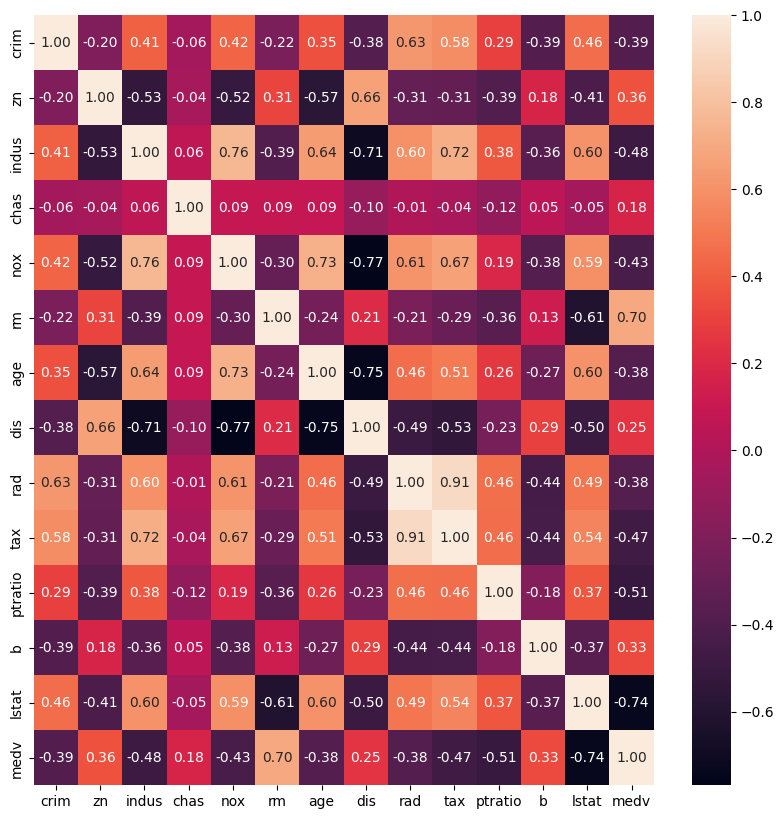

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

<Axes: >

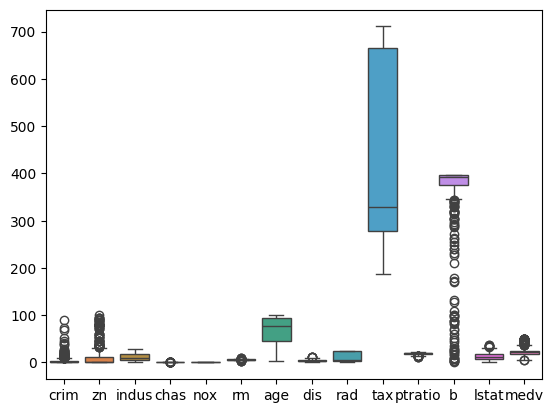

In [9]:
sns.boxplot(data=df)

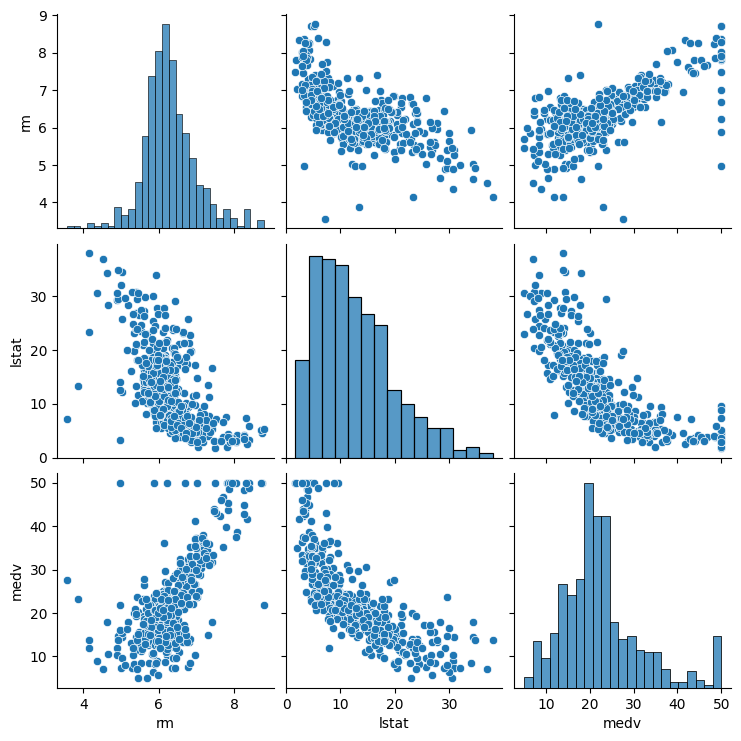

In [10]:
df2 = df[['rm', 'lstat','medv']]
sns.pairplot(df2)
plt.show()

In [11]:
X = df.drop(["medv"], axis=1)
Y = df["medv"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [14]:
model = LinearRegression()

In [15]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

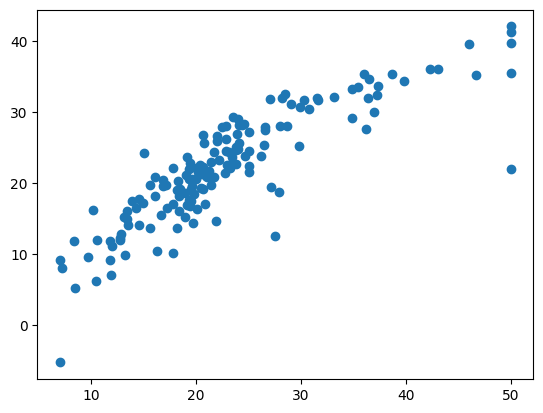

In [18]:
plt.scatter(Y_test, y_pred)

In [19]:
print("RMSE: ", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("R2: ", r2_score(Y_test, y_pred))
print("MAE: ", mean_absolute_error(Y_test, y_pred))

RMSE:  4.72356430947659
R2:  0.7406495431167908
MAE:  3.2171737210439084


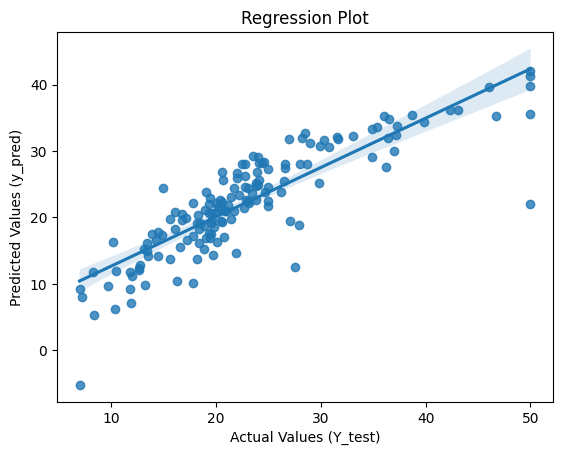

In [20]:
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Regression Plot')
plt.show()